In [ ]:
import scvelo as scv
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import igraph
import scvelo as scv
import loompy as lmp
import anndata
import os
import re
scv.set_figure_params(style="scvelo")
pl.rcParams["figure.figsize"] = (10,10)
Colorss=["#E41A1C","#377EB8","#4DAF4A","#984EA3","#FF7F00","#FFFF33","#A65628","#F781BF"]
#velocyto run10x /Volumes/Extreme\ Pro/D16_boost/ Users/fayzan/Downloads/refdata-gex-GRCh38-2020-A/genes/genes.gtf



In [51]:
adata_WT1 = scv.read('/Users/fayzan/PycharmProjects/Betel/Aim2/SCVELO_Surv/GWT1.loom')
adata_KO1 = scv.read('/Users/fayzan/PycharmProjects/Betel/Aim2/SCVELO_Surv/GKO1.loom')
adata_WT2 = scv.read('/Users/fayzan/PycharmProjects/Betel/Aim2/SCVELO_Surv/GWT2.loom')
adata_KO2 = scv.read('/Users/fayzan/PycharmProjects/Betel/Aim2/SCVELO_Surv/GKO2.loom')


In [52]:
#Merge all velocyto files and then subset the cells. Then merge info.
adata_WT1.obs['newid'] = adata_WT1.obs.index
adata_WT2.obs['newid'] = adata_WT2.obs.index
adata_KO1.obs['newid'] = adata_KO1.obs.index
adata_KO2.obs['newid'] = adata_KO2.obs.index

In [22]:
adata_WT1.obs


,Clusters,_X,_Y,newid
CellID,,,,
GWT1:AAAGTGATCACCGACGx,1,-17.077444,-11.869936,GWT1:AAAGTGATCACCGACGx
GWT1:AACAAAGTCGGAGTGAx,9,12.098558,16.949923,GWT1:AACAAAGTCGGAGTGAx
GWT1:AAACGCTGTGTTCGATx,6,-4.913635,-31.655123,GWT1:AAACGCTGTGTTCGATx
GWT1:AAAGTCCCAACGACAGx,10,-13.780383,30.208845,GWT1:AAAGTCCCAACGACAGx
GWT1:AAAGTGAGTTCGAACTx,4,16.889030,-27.093758,GWT1:AAAGTGAGTTCGAACTx
...,...,...,...,...
GWT1:TTTGTTGGTCACTTAGx,0,-19.211367,18.296263,GWT1:TTTGTTGGTCACTTAGx
GWT1:TTTGTTGTCTAAGCCAx,8,37.145710,-3.072067,GWT1:TTTGTTGTCTAAGCCAx
GWT1:TTTGATCGTGCAATAAx,0,-37.280457,0.677654,GWT1:TTTGATCGTGCAATAAx


In [53]:
adata_WT1.obs['newid'] = adata_WT1.obs['newid'].str.replace(r'^.*?:', '',regex=True)
adata_WT2.obs['newid'] = adata_WT2.obs['newid'].str.replace(r'^.*?:', '',regex=True)
adata_KO1.obs['newid'] = adata_KO1.obs['newid'].str.replace(r'^.*?:', '',regex=True)
adata_KO2.obs['newid'] = adata_KO2.obs['newid'].str.replace(r'^.*?:', '',regex=True)

In [54]:
adata_WT1.obs['newid'] = adata_WT1.obs['newid'].str.replace(r'.$', '-1',regex=True)
adata_WT2.obs['newid'] = adata_WT2.obs['newid'].str.replace(r'.$', '-1',regex=True)
adata_KO1.obs['newid'] = adata_KO1.obs['newid'].str.replace(r'.$', '-1',regex=True)
adata_KO2.obs['newid'] = adata_KO2.obs['newid'].str.replace(r'.$', '-1',regex=True)
adata_WT1.obs

,Clusters,_X,_Y,newid
CellID,,,,
GWT1:AAAGTGATCACCGACGx,1,-17.077444,-11.869936,AAAGTGATCACCGACG-1
GWT1:AACAAAGTCGGAGTGAx,9,12.098558,16.949923,AACAAAGTCGGAGTGA-1
GWT1:AAACGCTGTGTTCGATx,6,-4.913635,-31.655123,AAACGCTGTGTTCGAT-1
GWT1:AAAGTCCCAACGACAGx,10,-13.780383,30.208845,AAAGTCCCAACGACAG-1
GWT1:AAAGTGAGTTCGAACTx,4,16.889030,-27.093758,AAAGTGAGTTCGAACT-1
...,...,...,...,...
GWT1:TTTGTTGGTCACTTAGx,0,-19.211367,18.296263,TTTGTTGGTCACTTAG-1
GWT1:TTTGTTGTCTAAGCCAx,8,37.145710,-3.072067,TTTGTTGTCTAAGCCA-1
GWT1:TTTGATCGTGCAATAAx,0,-37.280457,0.677654,TTTGATCGTGCAATAA-1


In [24]:
sample_obs = pd.read_csv("/Users/fayzan/PycharmProjects/Betel/Aim2/SCVELO_Surv/cellID_obsunique.csv")
sample_obs_all = pd.read_csv("/Users/fayzan/PycharmProjects/Betel/Aim2/SCVELO_Surv/cellID_obsnotunique.csv")
umap_cord = pd.read_csv("/Users/fayzan/PycharmProjects/Betel/Aim2/SCVELO_Surv/cell_embeddings.csv")
cell_clusters = pd.read_csv("/Users/fayzan/PycharmProjects/Betel/Aim2/SCVELO_Surv/clusters.csv")

In [25]:
sample_obs["x"]

0        AAACCCAAGCCATTTG-1
1        AAACCCAAGCGACCCT-1
2        AAACCCAAGCTACAAA-1
3        AAACCCAAGGAGGTTC-1
4        AAACCCAAGGTAAGTT-1
                ...        
43247    TTTGTTGGTTCAAGTC-1
43248    TTTGTTGTCCCAGCGA-1
43249    TTTGTTGTCGCGTTTC-1
43250    TTTGTTGTCTAGCCAA-1
43251    TTTGTTGTCTGTAACG-1
Name: x, Length: 43252, dtype: object

In [55]:
#Take Unique Cells
adata_WT1 = adata_WT1[np.isin(adata_WT1.obs.newid, sample_obs["x"])]
adata_KO1 = adata_KO1[np.isin(adata_KO1.obs.newid, sample_obs["x"])]
adata_WT2 = adata_WT2[np.isin(adata_WT2.obs.newid, sample_obs["x"])]
adata_KO2 = adata_KO2[np.isin(adata_KO2.obs.newid, sample_obs["x"])]


,Clusters,_X,_Y,newid
CellID,,,,
GWT2:AAAGTGAGTCCTCCATx,1,5.989849,15.507957,AAAGTGAGTCCTCCAT-1
GWT2:AAACCCAGTACTGGGAx,11,-33.459461,-26.805746,AAACCCAGTACTGGGA-1
GWT2:AAACGAATCGACGATTx,4,-39.591656,2.450825,AAACGAATCGACGATT-1
GWT2:AAACCCAGTATTGGCTx,0,0.648654,-10.555010,AAACCCAGTATTGGCT-1
GWT2:AAACGCTGTAGTCTTGx,6,23.673765,-17.025333,AAACGCTGTAGTCTTG-1
...,...,...,...,...
GWT2:TTTCCTCGTCCCTAAAx,0,7.761185,-4.176427,TTTCCTCGTCCCTAAA-1
GWT2:TTTGATCAGAAACTACx,2,-11.036859,-34.119938,TTTGATCAGAAACTAC-1
GWT2:TTTGTTGAGGACACTGx,8,-28.032364,-16.159655,TTTGTTGAGGACACTG-1


In [60]:
adata_WT1.var_names_make_unique()
adata_WT2.var_names_make_unique()
adata_KO1.var_names_make_unique()
adata_KO2.var_names_make_unique()

In [61]:
invitro_all = adata_WT1.concatenate(adata_KO2, adata_WT2,adata_KO1)

In [62]:
invitro_all.obs['newid1']=invitro_all.obs['newid']
invitro_all.obs['newid1'].loc[~invitro_all.obs['newid'].duplicated(keep='first')]=''

In [63]:
invitro_all.obs

,Clusters,_X,_Y,newid,batch,newid1
CellID,,,,,,
GWT1:AAAGTGATCACCGACGx-0,1,-17.077444,-11.869936,AAAGTGATCACCGACG-1,0,
GWT1:AACAAAGTCGGAGTGAx-0,9,12.098558,16.949923,AACAAAGTCGGAGTGA-1,0,
GWT1:AAACGCTGTGTTCGATx-0,6,-4.913635,-31.655123,AAACGCTGTGTTCGAT-1,0,
GWT1:AAAGTCCCAACGACAGx-0,10,-13.780383,30.208845,AAAGTCCCAACGACAG-1,0,
GWT1:AAAGTGAGTTCGAACTx-0,4,16.889030,-27.093758,AAAGTGAGTTCGAACT-1,0,
...,...,...,...,...,...,...
GKO1:TTTGTTGCAGCAGATGx-3,11,17.495062,40.408279,TTTGTTGCAGCAGATG-1,3,
GKO1:TTTGGAGAGGAAGTAGx-3,8,9.889330,26.435860,TTTGGAGAGGAAGTAG-1,3,
GKO1:TTTGACTGTCGTACTAx-3,1,-21.976715,-2.905352,TTTGACTGTCGTACTA-1,3,


In [64]:
invitro_all3 =  invitro_all[invitro_all.obs.newid1 == ""]

In [65]:
invitro_all3

View of AnnData object with n_obs × n_vars = 43244 × 36601
    obs: 'Clusters', '_X', '_Y', 'newid', 'batch', 'newid1'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [66]:
invitro_all3.obs

,Clusters,_X,_Y,newid,batch,newid1
CellID,,,,,,
GWT1:AAAGTGATCACCGACGx-0,1,-17.077444,-11.869936,AAAGTGATCACCGACG-1,0,
GWT1:AACAAAGTCGGAGTGAx-0,9,12.098558,16.949923,AACAAAGTCGGAGTGA-1,0,
GWT1:AAACGCTGTGTTCGATx-0,6,-4.913635,-31.655123,AAACGCTGTGTTCGAT-1,0,
GWT1:AAAGTCCCAACGACAGx-0,10,-13.780383,30.208845,AAAGTCCCAACGACAG-1,0,
GWT1:AAAGTGAGTTCGAACTx-0,4,16.889030,-27.093758,AAAGTGAGTTCGAACT-1,0,
...,...,...,...,...,...,...
GKO1:TTTGTTGCAGCAGATGx-3,11,17.495062,40.408279,TTTGTTGCAGCAGATG-1,3,
GKO1:TTTGGAGAGGAAGTAGx-3,8,9.889330,26.435860,TTTGGAGAGGAAGTAG-1,3,
GKO1:TTTGACTGTCGTACTAx-3,1,-21.976715,-2.905352,TTTGACTGTCGTACTA-1,3,


In [67]:
umap_cord['Unnamed: 0'] = sample_obs_all["x"]
umap_cord = umap_cord.drop_duplicates(['Unnamed: 0'])
umap_cord

,Unnamed: 0,UMAP_1,UMAP_2
0,AAACCCAAGCCATTTG-1,4.506885,-1.428377
1,AAACCCAAGCGACCCT-1,0.658285,-0.615243
2,AAACCCAAGCTACAAA-1,3.812819,-1.517525
3,AAACCCAAGGAGGTTC-1,1.731572,2.718117
4,AAACCCAAGGTAAGTT-1,-1.495209,0.777464
...,...,...,...
43431,TTTGTTGGTTCAAGTC-1,0.783719,-5.733409
43432,TTTGTTGTCCCAGCGA-1,1.029591,-3.637614
43433,TTTGTTGTCGCGTTTC-1,2.494064,-0.962188
43434,TTTGTTGTCTAGCCAA-1,-0.310459,-5.098460


In [68]:
cell_clusters['Unnamed: 0'] = sample_obs_all["x"]
cell_clusters = cell_clusters.drop_duplicates(['Unnamed: 0'])

In [69]:
combined = cell_clusters.merge(umap_cord, on="Unnamed: 0")

In [70]:
invitro_all3.obs['CellID1'] = invitro_all3.obs.index
invitro_all3.obs = invitro_all3.obs.merge(combined,left_on="newid", right_on="Unnamed: 0", how="left")

In [71]:
invitro_all3.obs["CellID"] = invitro_all3.obs["CellID1"]
invitro_all3.obs.index = invitro_all3.obs["CellID"]
invitro_all3.obs

,Clusters,_X,_Y,newid,batch,newid1,CellID1,Unnamed: 0,x,UMAP_1,UMAP_2,CellID
CellID,,,,,,,,,,,,
GWT1:AAAGTGATCACCGACGx-0,1,-17.077444,-11.869936,AAAGTGATCACCGACG-1,0,,GWT1:AAAGTGATCACCGACGx-0,AAAGTGATCACCGACG-1,1,-2.844779,-4.741085,GWT1:AAAGTGATCACCGACGx-0
GWT1:AACAAAGTCGGAGTGAx-0,9,12.098558,16.949923,AACAAAGTCGGAGTGA-1,0,,GWT1:AACAAAGTCGGAGTGAx-0,AACAAAGTCGGAGTGA-1,1,-3.589407,0.633650,GWT1:AACAAAGTCGGAGTGAx-0
GWT1:AAACGCTGTGTTCGATx-0,6,-4.913635,-31.655123,AAACGCTGTGTTCGAT-1,0,,GWT1:AAACGCTGTGTTCGATx-0,AAACGCTGTGTTCGAT-1,1,1.552553,1.454273,GWT1:AAACGCTGTGTTCGATx-0
GWT1:AAAGTCCCAACGACAGx-0,10,-13.780383,30.208845,AAAGTCCCAACGACAG-1,0,,GWT1:AAAGTCCCAACGACAGx-0,AAAGTCCCAACGACAG-1,1,-1.306827,-0.967202,GWT1:AAAGTCCCAACGACAGx-0
GWT1:AAAGTGAGTTCGAACTx-0,4,16.889030,-27.093758,AAAGTGAGTTCGAACT-1,0,,GWT1:AAAGTGAGTTCGAACTx-0,AAAGTGAGTTCGAACT-1,1,-1.542258,3.240822,GWT1:AAAGTGAGTTCGAACTx-0
...,...,...,...,...,...,...,...,...,...,...,...,...
GKO1:TTTGTTGCAGCAGATGx-3,11,17.495062,40.408279,TTTGTTGCAGCAGATG-1,3,,GKO1:TTTGTTGCAGCAGATGx-3,TTTGTTGCAGCAGATG-1,4,2.015658,-7.688165,GKO1:TTTGTTGCAGCAGATGx-3
GKO1:TTTGGAGAGGAAGTAGx-3,8,9.889330,26.435860,TTTGGAGAGGAAGTAG-1,3,,GKO1:TTTGGAGAGGAAGTAGx-3,TTTGGAGAGGAAGTAG-1,4,-0.598763,-2.847061,GKO1:TTTGGAGAGGAAGTAGx-3
GKO1:TTTGACTGTCGTACTAx-3,1,-21.976715,-2.905352,TTTGACTGTCGTACTA-1,3,,GKO1:TTTGACTGTCGTACTAx-3,TTTGACTGTCGTACTA-1,1,2.514450,-1.494023,GKO1:TTTGACTGTCGTACTAx-3


In [73]:
X_umap = np.stack([invitro_all3.obs["UMAP_1"], invitro_all3.obs["UMAP_2"]]).T

In [74]:
invitro_all3.obsm['X_umap'] = X_umap


In [75]:
invitro2 =invitro_all3

In [76]:
scv.pp.filter_and_normalize(invitro2, min_shared_counts=30, n_top_genes=4000)

Filtered out 25057 genes that are detected 30 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 4000 highly variable genes.
Logarithmized X.


In [77]:
scv.pp.moments(invitro2, n_pcs=100, n_neighbors=20)
scv.tl.recover_dynamics(invitro2)
scv.tl.velocity(invitro2, mode='dynamical', )
scv.tl.velocity_graph(invitro2)
scv.tl.recover_latent_time(invitro2, t_max=20000)

computing neighbors
    finished (0:00:31) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:13) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/8 cores)


  0%|          | 0/914 [00:00<?, ?gene/s]

    finished (0:43:35) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:51) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/43244 [00:00<?, ?cells/s]

    finished (0:01:57) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 10 regions of root cells and 1 region of end points .
    finished (0:00:11) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:25) --> added 
    'latent_time', shared time (adata.obs)


In [1]:
scv.pl.velocity_embedding_stream(invitro2,color='x', title='Survival_SCVELO',save='/Users/fayzan/PycharmProjects/Betel/scVelo-survival2.png')

NameError: name 'scv' is not defined

In [92]:
scv.pl.velocity(invitro2, ['TP53'], ncols=2, save='/Users/fayzan/PycharmProjects/Betel/scVelo-umap-genes.png')

ValueError: Number of rows must be a positive integer, not 0

<Figure size 3000x0 with 0 Axes>

In [80]:
scv.tl.rank_velocity_genes(invitro2, groupby='x', min_corr=.15)

df = scv.DataFrame(invitro2.uns['rank_velocity_genes']['names'])
df.head(100)

ranking velocity genes


/Users/fayzan/PycharmProjects/Betel/venv/lib/python3.8/site-packages/scvelo/tools/utils.py:501: DeprecationWarning: Please use `rankdata` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import rankdata


    finished (0:01:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


/var/folders/qp/kmdv8mvd271c5z_q5khfgr500000gn/T/ipykernel_39855/3448377130.py:3: DeprecationWarning: `scvelo.read_load.get_df` is deprecated since scVelo v0.2.4 and will be removed in a future version. Please use `scvelo.core.get_df` instead.
  df = scv.DataFrame(invitro2.uns['rank_velocity_genes']['names'])


,1,2,3,4,5,6,7
0,C7orf33,CDKN1C,ARF1,PDIA3,SULF1,YAP1,YAP1
1,BTBD8,ACHE,FTH1,RPS27L,YAP1,TCF7L1,MCL1
2,SNAP25,CXXC5,ARX,SPDYA,TCF7L1,KPNA2,MEX3A
3,SYT13,RPS27L,TCF7L1,GAP43,ARX,EIF1,TCF7L1
4,UPP1,TCF7L1,KPNA2,PRXL2A,ARF1,ARX,VGF
...,...,...,...,...,...,...,...
95,CCBE1,PPFIA3,MIB1,MARCH3,RBM39,COL4A5,CTNNAL1
96,PAM,GSK3A,MYC,MAML2,TRIM28,KLHL35,ZFHX4
97,UBC,DDX39B,IRS2,DYNLL1,GABARAPL1,HCN2,YPEL5
98,VSTM2L,GABRR2,NEFM,LMO3,HNRNPL,SMPDL3A,CWC25


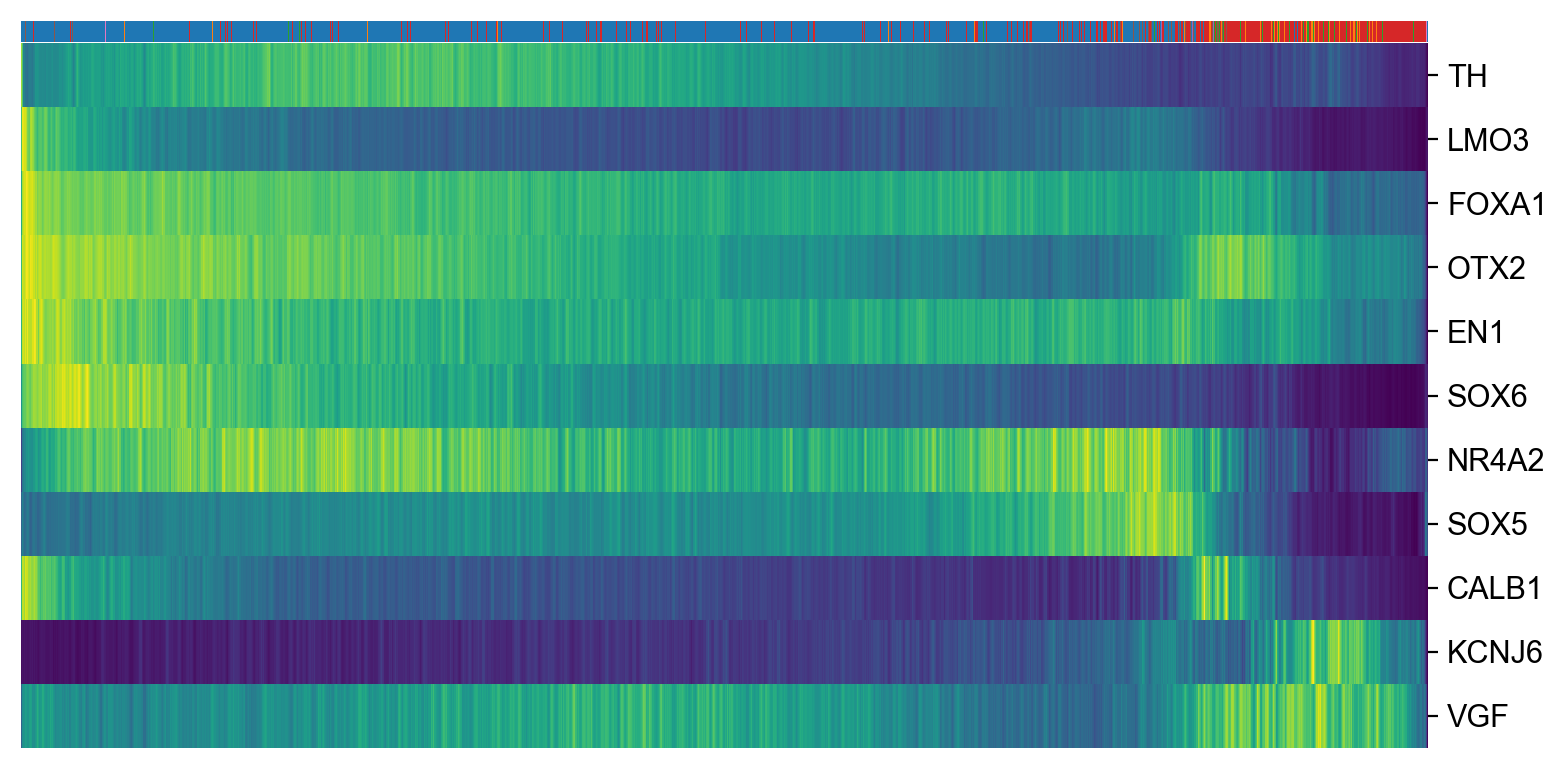

In [84]:
scv.pl.heatmap(invitro2, var_names=["ALDH1A1", "LMO3", "KCNJ6", "AGTR1", "EN1", "TH", "NR4A2", "FOXA1","SOX6", "SOX5", "VGF", "CALB1", "CALB2", "OTX2", "BAX", "JUN"], sortby='latent_time', col_color='x', n_convolve=100, colorbar=True, sort=True)

In [ ]:
scv.tl.velocity_pseudotime(invitro2)
scv.pl.scatter(invitro2, color='latent_time', cmap='gnuplot', save='/Users/fayzan/PycharmProjects/Betel/scVelo-latent-time2.png')


In [ ]:
#Run Cell rank and get dodendogram

In [88]:
scv.pl.paga(invitro2, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

KeyError: 'paga'

In [93]:
import cellrank as cr




/Users/fayzan/PycharmProjects/Betel/venv/lib/python3.8/site-packages/cellrank/tl/estimators/_utils.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Iterable
/Users/fayzan/PycharmProjects/Betel/venv/lib/python3.8/site-packages/cellrank/pl/_heatmap.py:36: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


In [ ]:

cr.tl.terminal_states(invitro2, cluster_key="x", weight_connectivities=0.2)
cr.pl.terminal_states(invitro2)

/var/folders/qp/kmdv8mvd271c5z_q5khfgr500000gn/T/ipykernel_39855/513860638.py:1: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.terminal_states(invitro2, cluster_key="x", weight_connectivities=0.2)
/Users/fayzan/PycharmProjects/Betel/venv/lib/python3.8/site-packages/cellrank/tl/_init_term_states.py:156: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  kernel = transition_matrix(


  0%|          | 0/43244 [00:00<?, ?cell/s]

  0%|          | 0/43244 [00:00<?, ?cell/s]